In [0]:
import numpy as np
from sklearn.datasets import load_sample_image
import tensorflow as tf

In [0]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

dataset = np.array([flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape
dataset.shape

(1, 427, 640, 3)

In [0]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical
filters[3, :, :, 1] = 0 # horizontal

In [0]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
conv = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding='SAME')

In [0]:
with tf.Session() as sess:
  out = sess.run(conv, feed_dict={X: [flower]})

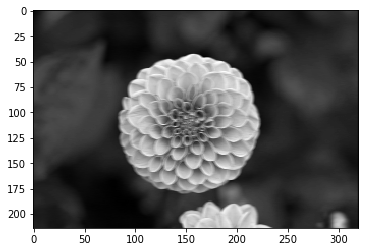

In [0]:
import matplotlib.pyplot as plt

plt.imshow(out[0, :, :, 1], cmap='gray')
plt.show()

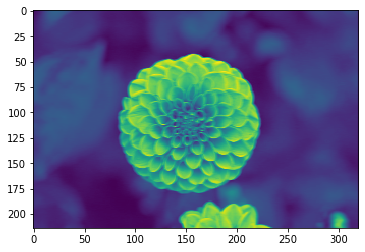

In [0]:
zeros = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
conv2 = tf.nn.conv2d(X, zeros, strides=[1, 2, 2, 1], padding="SAME")

with tf.Session() as sess:
  out2 = sess.run(conv2, feed_dict={X: [flower]})

plt.imshow(out[0, :, :, 1])
plt.show()

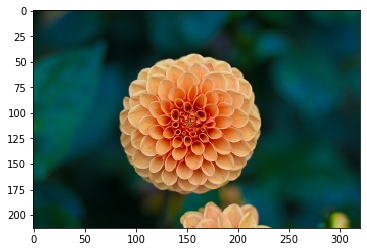

In [0]:
max_pool = tf.nn.avg_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")

with tf.Session() as sess:
  res = sess.run(max_pool, feed_dict={X: [flower]})

plt.imshow(res[0].astype(np.uint8))
plt.show()